In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import cv2
from tensorflow import keras
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.layers import Dense, Dropout, Flatten

In [3]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)


In [4]:
train_dataset = train.flow_from_directory('Dataset LBP/K-Fold 4/Train/',target_size=(128,128), batch_size=1, class_mode = 'categorical')
valid_dataset = validation.flow_from_directory('Dataset LBP/K-Fold 4/Validation/',target_size=(128,128), batch_size=1, class_mode='categorical')

Found 2250 images belonging to 6 classes.
Found 750 images belonging to 6 classes.


In [5]:
train_dataset.class_indices


{'fauzan': 0, 'fikri': 1, 'fuad': 2, 'ilham': 3, 'nabila': 4, 'siti': 5}

In [6]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(filters=16, kernel_size=5, padding="same",activation='relu', input_shape=(128,128,3)),
                                    
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
                                    
                                    tf.keras.layers.Conv2D(filters=24, kernel_size=5, padding="same",activation='relu'), 
                                   
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
                                    
                                    tf.keras.layers.Dropout(0.25),
                                
                                    tf.keras.layers.Flatten(),
                                    
                                    tf.keras.layers.Dense(512, activation='relu'),
    
                                    tf.keras.layers.Dense(1024, activation='relu'),
                                    tf.keras.layers.Dropout(0.6),
                                    tf.keras.layers.Dense(6, activation='softmax')
                                   
                    
                                   ])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 16)      1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 24)        9624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 24)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 24)        0         
_________________________________________________________________
flatten (Flatten)            (None, 24576)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               1

In [8]:
optimize = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimize, metrics=['accuracy'])

In [9]:
model_fit = model.fit(train_dataset,
                   
                     epochs = 10,
                     validation_data = valid_dataset)

Epoch 1/10
2250/2250 [==============================] - 401s 177ms/step - loss: 0.9711 - accuracy: 0.6311 - val_loss: 1.2530 - val_accuracy: 0.7813
Epoch 2/10
2250/2250 [==============================] - 397s 177ms/step - loss: 0.2581 - accuracy: 0.9222 - val_loss: 1.2449 - val_accuracy: 0.8093
Epoch 3/10
2250/2250 [==============================] - 405s 180ms/step - loss: 0.1307 - accuracy: 0.9760 - val_loss: 2.5110 - val_accuracy: 0.8267
Epoch 4/10
2250/2250 [==============================] - 407s 181ms/step - loss: 0.2093 - accuracy: 0.9547 - val_loss: 6.1824 - val_accuracy: 0.8240
Epoch 5/10
2250/2250 [==============================] - 409s 182ms/step - loss: 0.1708 - accuracy: 0.9636 - val_loss: 5.9383 - val_accuracy: 0.8213
Epoch 6/10
2250/2250 [==============================] - 326s 145ms/step - loss: 0.0460 - accuracy: 0.9893 - val_loss: 5.4026 - val_accuracy: 0.8253
Epoch 7/10
2250/2250 [==============================] - 321s 143ms/step - loss: 0.1350 - accuracy: 0.9849 - val_

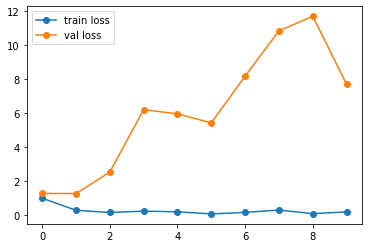

<Figure size 432x288 with 0 Axes>

In [10]:
plt.plot(model_fit.history['loss'], '-o',label='train loss')
plt.plot(model_fit.history['val_loss'], '-o' ,label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')



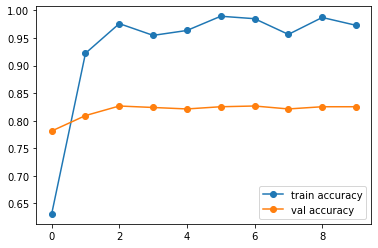

<Figure size 432x288 with 0 Axes>

In [11]:
# accuracies
plt.plot(model_fit.history['accuracy'], '-o',label='train accuracy')
plt.plot(model_fit.history['val_accuracy'], '-o',label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

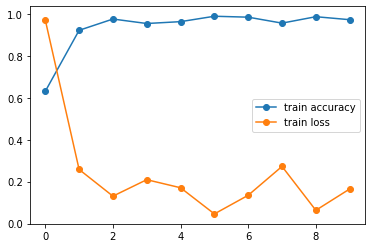

<Figure size 432x288 with 0 Axes>

In [12]:
# accuracies
plt.plot(model_fit.history['accuracy'], '-o',label='train accuracy')
plt.plot(model_fit.history['loss'], '-o',label='train loss')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

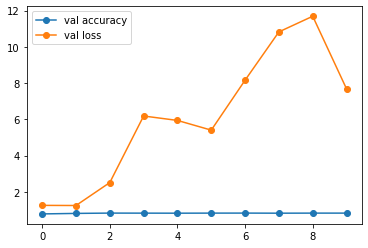

<Figure size 432x288 with 0 Axes>

In [13]:
# accuracies
plt.plot(model_fit.history['val_accuracy'], '-o',label='val accuracy')
plt.plot(model_fit.history['val_loss'], '-o' ,label='val loss')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
model.save("modelrgbimageskfold4cnn+haar.h5")

In [ ]:
from tensorflow import keras
model = keras.models.load_model('modelrgbimageskfold4cnn+haar.h5')

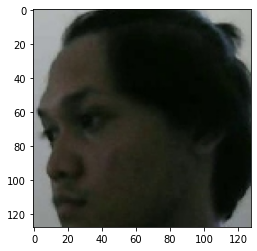

siti


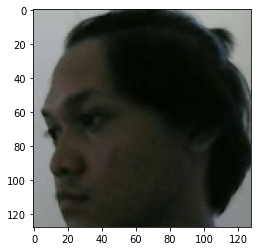

siti


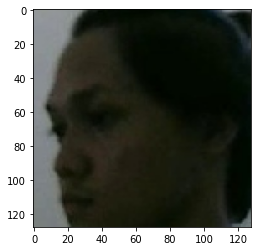

siti


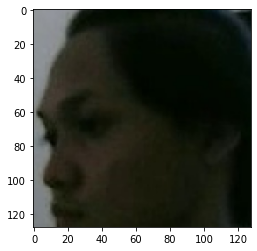

fuad


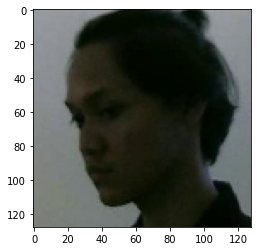

nabila


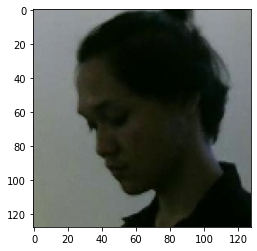

fuad


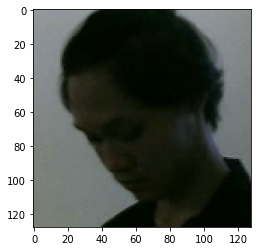

fuad


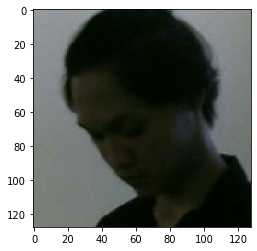

fuad


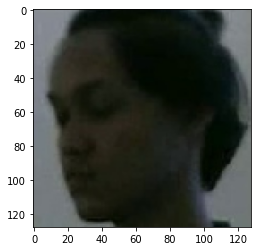

fuad


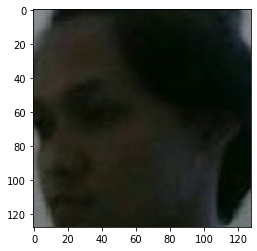

siti


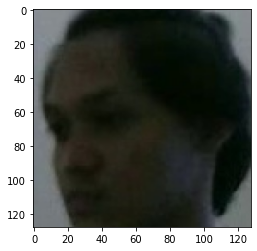

siti


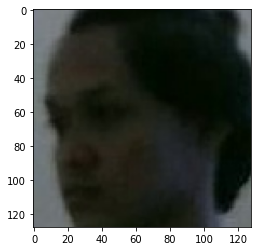

siti


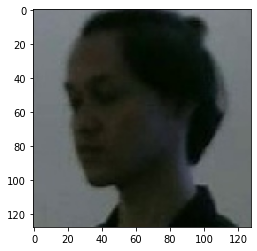

nabila


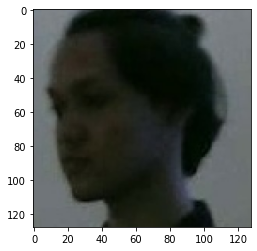

nabila


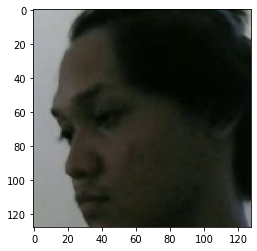

siti


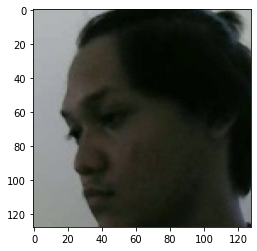

siti


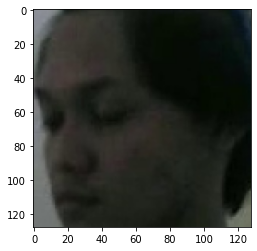

siti


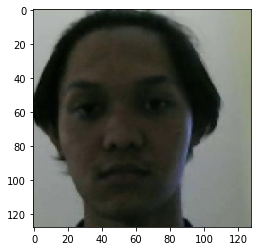

nabila


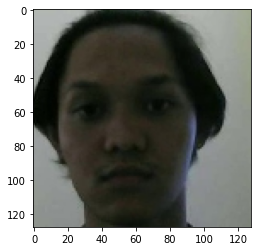

nabila


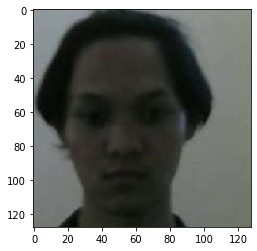

fuad


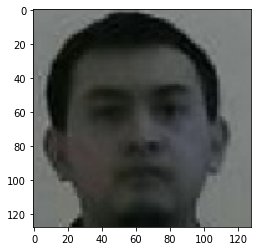

nabila


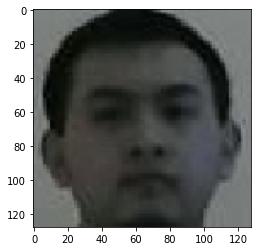

nabila


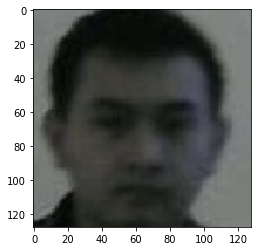

nabila


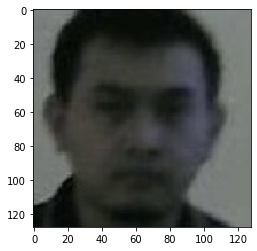

nabila


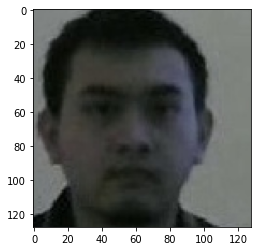

nabila


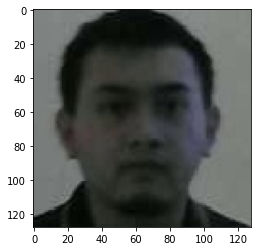

nabila


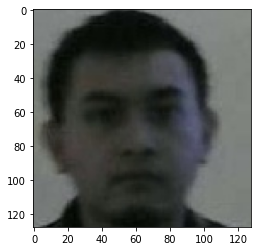

nabila


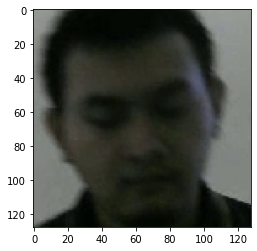

fuad


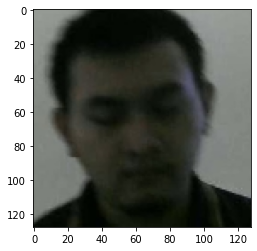

fuad


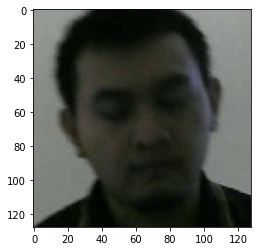

siti


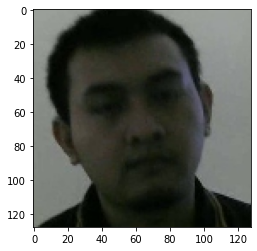

nabila


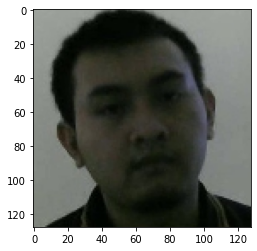

nabila


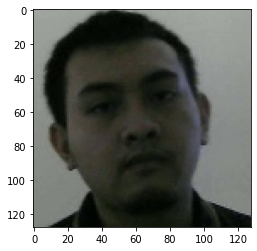

fuad


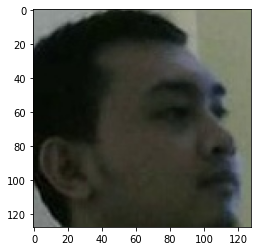

siti


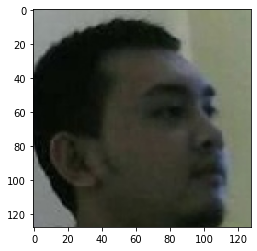

siti


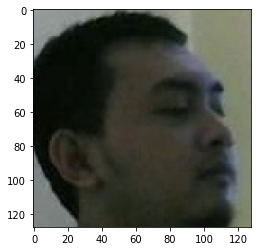

siti


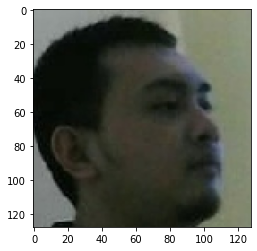

siti


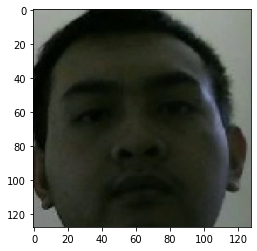

nabila


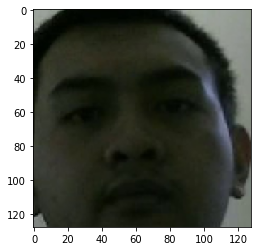

nabila


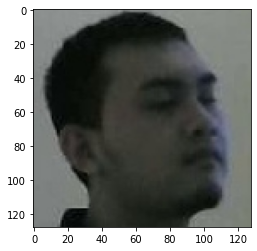

nabila


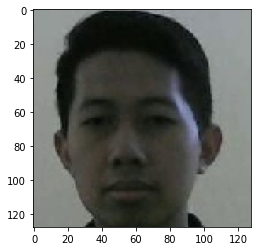

nabila


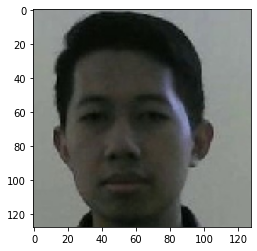

nabila


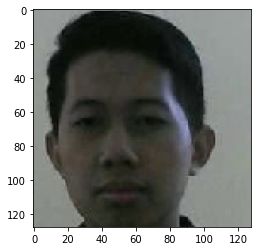

nabila


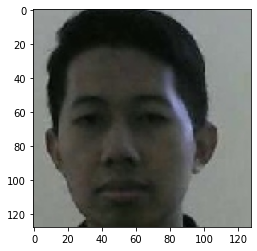

nabila


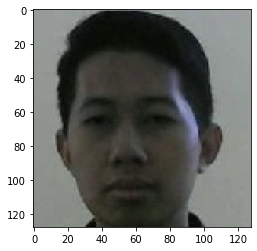

nabila


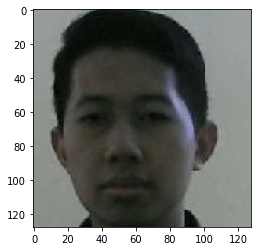

nabila


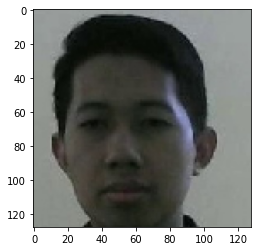

nabila


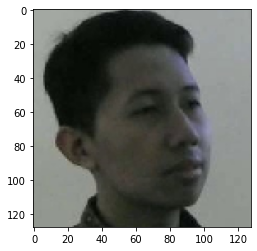

nabila


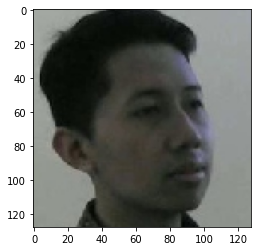

nabila


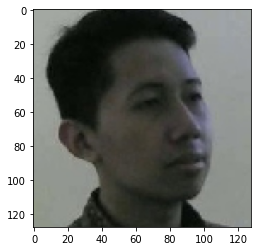

nabila


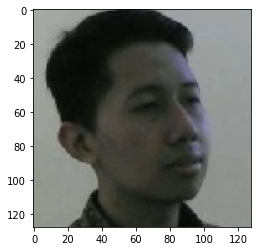

nabila


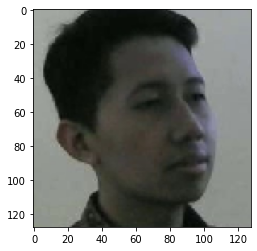

nabila


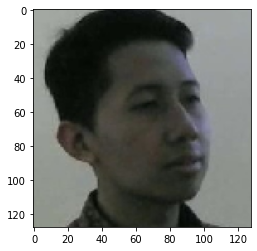

nabila


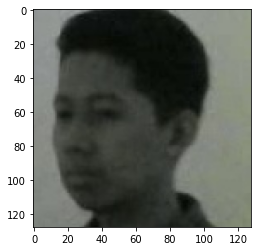

fuad


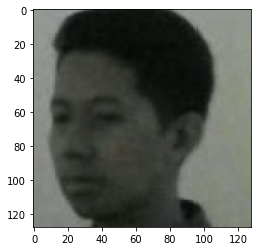

nabila


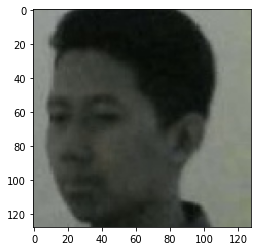

nabila


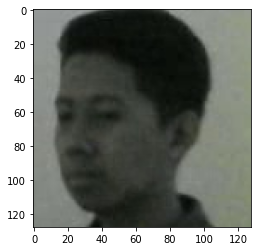

nabila


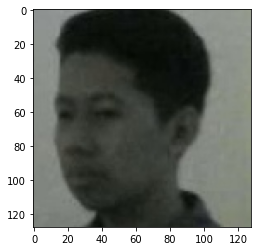

nabila


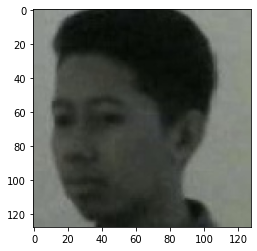

nabila


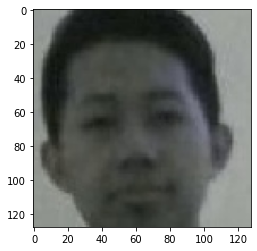

nabila


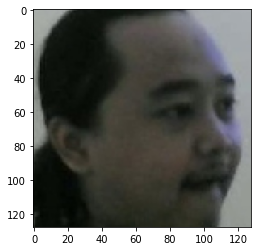

fuad


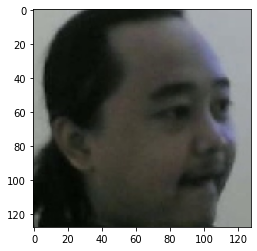

fuad


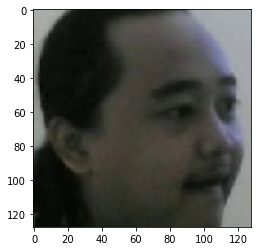

fuad


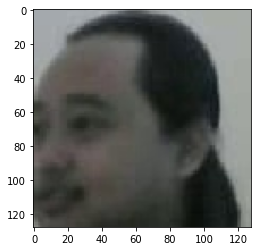

nabila


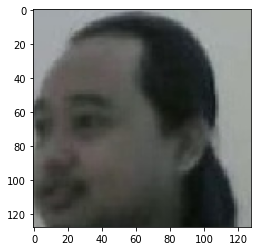

nabila


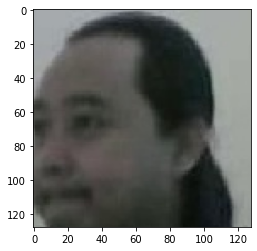

fuad


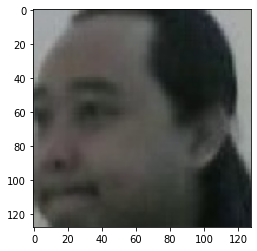

fuad


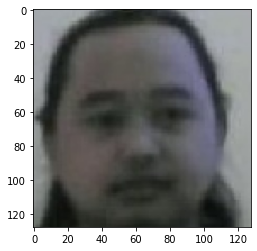

fuad


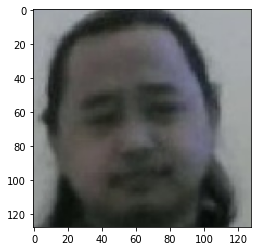

nabila


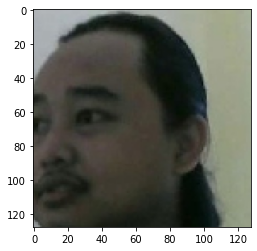

fuad


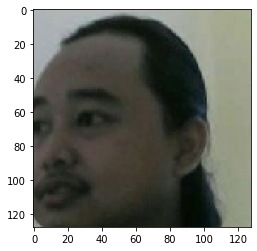

fuad


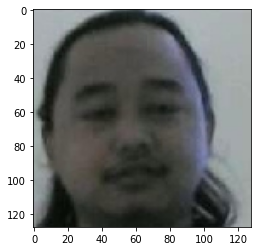

nabila


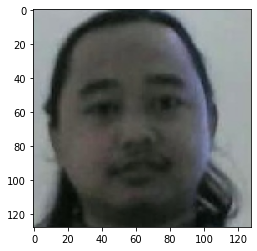

nabila


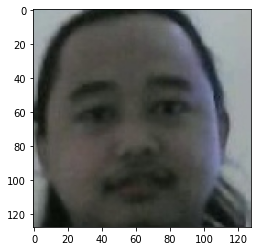

nabila


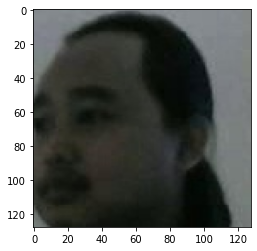

nabila


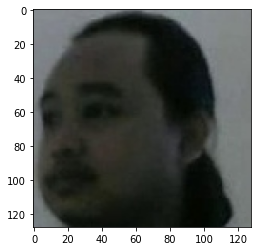

nabila


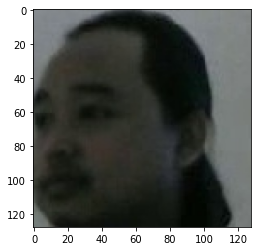

nabila


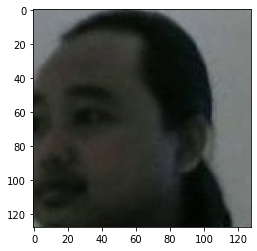

nabila


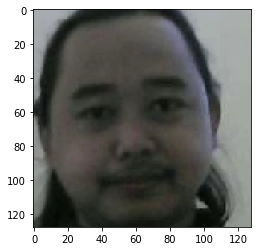

nabila


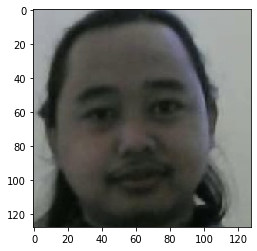

nabila


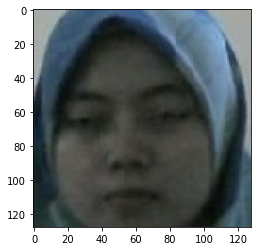

fuad


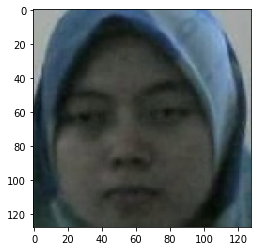

fuad


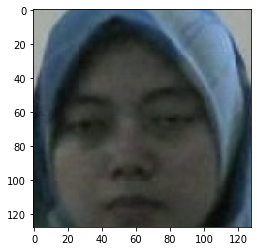

fuad


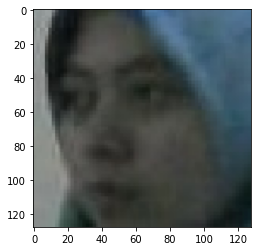

fuad


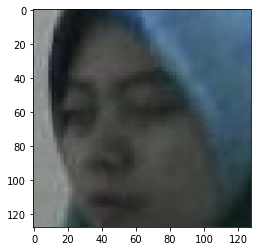

fuad


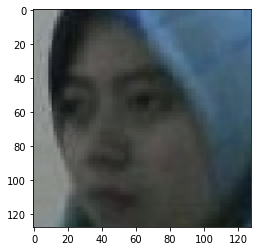

nabila


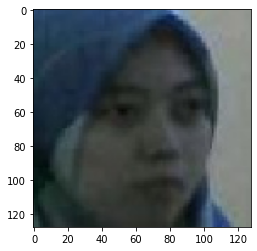

nabila


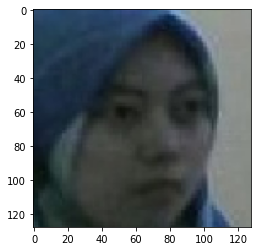

nabila


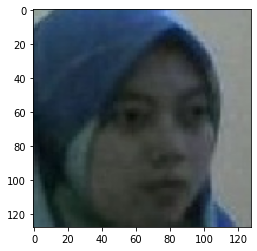

nabila


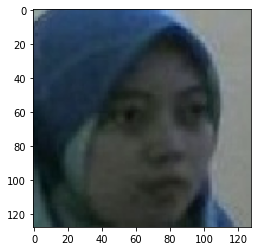

nabila


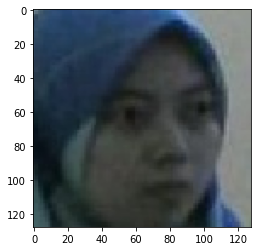

nabila


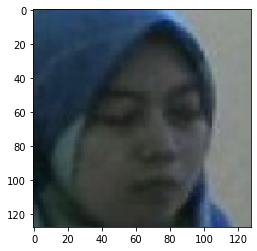

nabila


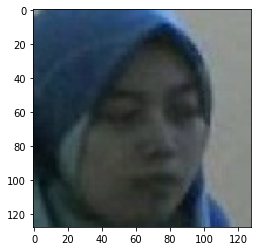

nabila


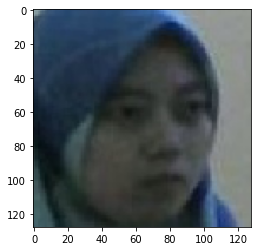

nabila


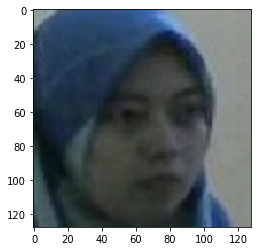

nabila


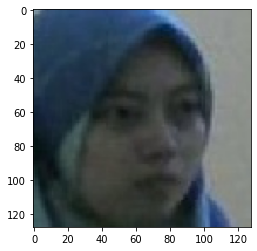

nabila


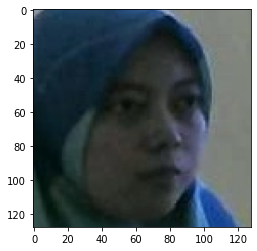

nabila


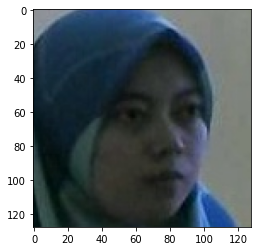

nabila


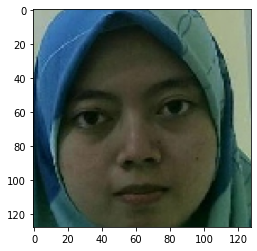

fuad


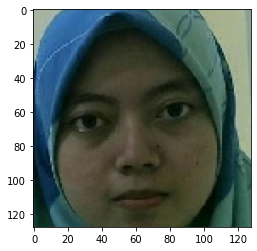

fuad


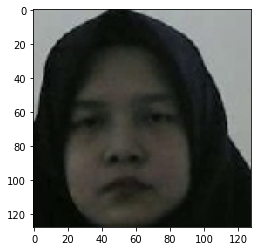

fuad


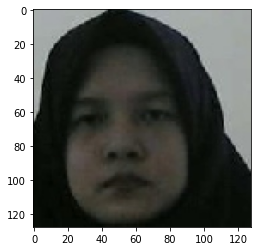

fuad


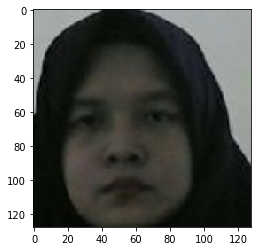

fuad


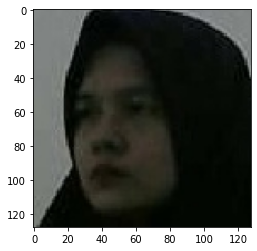

nabila


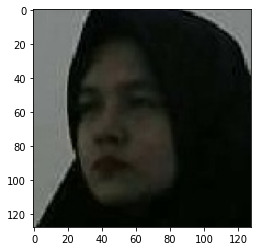

fauzan


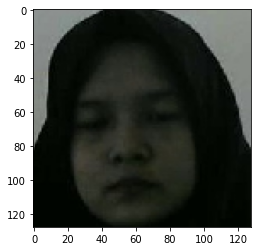

fauzan


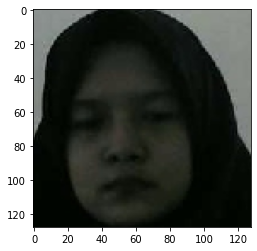

fuad


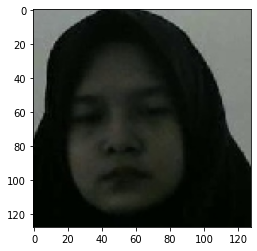

nabila


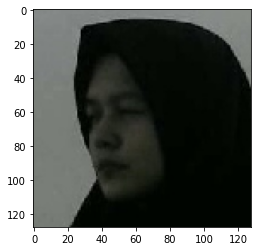

siti


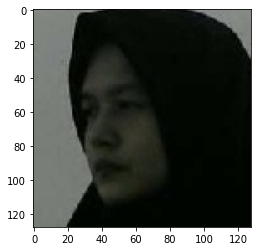

siti


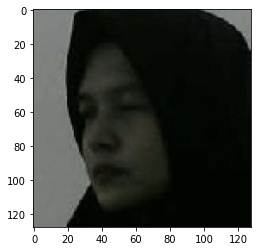

siti


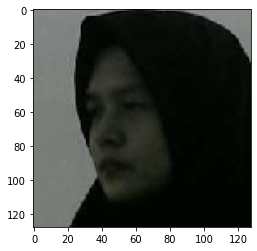

siti


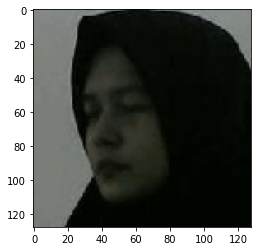

siti


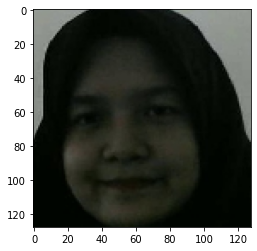

fauzan


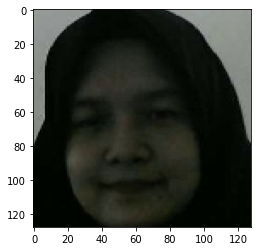

fauzan


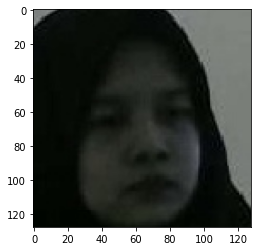

nabila


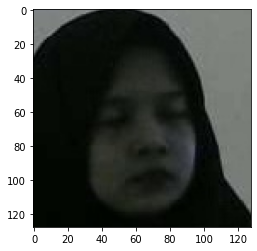

fuad


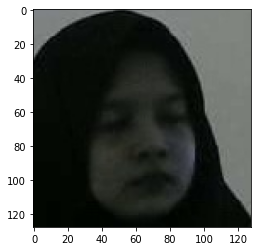

fuad


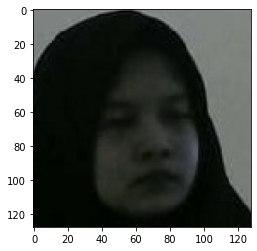

fuad


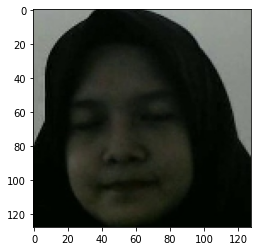

fuad


In [14]:
dir_path = 'Dataset for RGB/Dataset LBP/Prediction/'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i, target_size=(128,128))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    if val[0][0]==1:
        print('fauzan')
    elif val[0][1]==1:
        print('fikri')
    elif val[0][2]==1:
        print('fuad')
    elif val[0][3]==1:
        print('ilham')
    elif val[0][4]==1:
        print('nabila')
    elif val[0][5]==1:
        print('siti')
    

In [ ]:
    if val[0][0]==1:
        print('fauzan')
    elif val[0][1]==1:
        print('fikri')
    elif val[0][2]==1:
        print('fuad')
    elif val[0][3]==1:
        print('ilham')
    elif val[0][4]==1:
        print('nabila')
    elif val[0][5]==1:
        print('siti')

In [3]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
   
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

In [11]:
truth =      ["Fauzan","Fauzan","Fauzan","Fauzan","Fauzan","Fauzan","Fauzan","Fauzan","Fauzan","Fauzan","Fauzan","Fauzan","Fauzan","Fauzan","Fauzan","Fauzan","Fauzan","Fauzan","Fauzan","Fauzan",
             "Fikri","Fikri","Fikri","Fikri","Fikri","Fikri","Fikri","Fikri","Fikri","Fikri","Fikri","Fikri","Fikri","Fikri","Fikri","Fikri","Fikri","Fikri","Fuad","Fikri",
             "Fuad","Fuad","Fuad","Fuad","Fuad","Fuad","Fuad","Fuad","Fuad","Fuad","Fuad","Fuad","Fuad","Fuad","Fuad","Fuad","Fuad","Fuad","Fuad","Fuad",
             "Ilham","Ilham","Ilham","Ilham","Ilham","Ilham","Ilham","Ilham","Ilham","Ilham","Ilham","Ilham","Ilham","Ilham","Ilham","Ilham","Ilham","Ilham","Ilham","Ilham",
             "Nabila","Nabila","Nabila","Nabila","Nabila","Nabila","Nabila","Nabila","Nabila","Nabila","Nabila","Nabila","Nabila","Nabila","Nabila","Nabila","Nabila","Nabila","Nabila","Nabila",
             "Siti","Siti","Siti","Siti","Siti","Siti","Siti","Siti","Siti","Siti","Siti","Siti","Siti","Siti","Siti","Siti","Siti","Siti","Siti","Siti"]


prediction =    ["Nabila","Nabila","Nabila","Nabila","Nabila","Nabila","Nabila","Fuad","Siti","Siti","Siti","Siti","Siti","Siti","Siti","Siti","Ilham","Ilham","Fauzan","Fauzan",
             "Nabila","Nabila","Nabila","Nabila","Nabila","Nabila","Nabila","Ilham","Ilham","Siti","Siti","Siti","Siti","Siti","Siti","Siti","Fauzan","Fikri","Fikri",
             "Siti","Siti","Siti","Siti","Siti","Siti","Siti","Siti","Ilham","Ilham","Ilham","Ilham","Fauzan","Nabila","Nabila","Nabila","Nabila","Fuad","Fuad","Fuad","Fuad",
             "Fuad","Fuad","Siti","Siti","Siti","Siti","Fauzan","Fauzan","Fauzan","Fauzan","Ilham","Ilham","Ilham","Ilham","Ilham","Ilham","Ilham","Ilham","Ilham","Ilham",
             "Siti","Siti","Siti","Siti","Siti","Siti","Siti","Siti","Siti","Siti","Siti","Ilham","Ilham","Fuad","Fuad","Fuad","Fuad","Nabila","Nabila","Nabila",
             "Siti","Siti","Siti","Siti","Siti","Siti","Siti","Siti","Siti","Siti","Siti","Siti","Siti","Siti","Siti","Siti","Siti","Siti","Siti","Siti"]


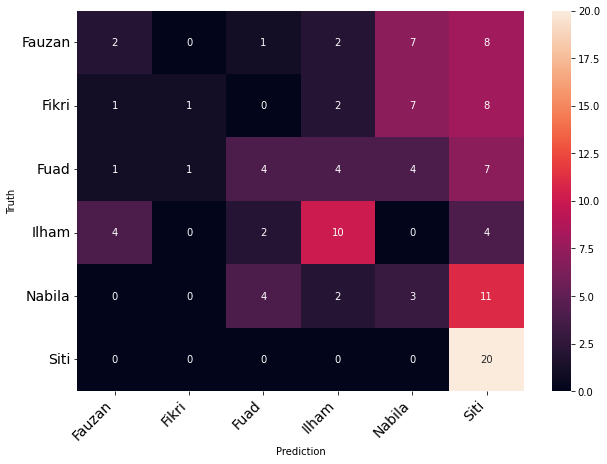

In [12]:
cm = confusion_matrix(truth,prediction)
print_confusion_matrix(cm,["Fauzan","Fikri","Fuad","Ilham","Nabila","Siti"])

In [13]:
print(classification_report(truth, prediction))

              precision    recall  f1-score   support

      Fauzan       0.25      0.10      0.14        20
       Fikri       0.50      0.05      0.10        19
        Fuad       0.36      0.19      0.25        21
       Ilham       0.50      0.50      0.50        20
      Nabila       0.14      0.15      0.15        20
        Siti       0.34      1.00      0.51        20

    accuracy                           0.33       120
   macro avg       0.35      0.33      0.27       120
weighted avg       0.35      0.33      0.28       120



In [ ]:

# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
 
# load model
model = load_model('model research/modelkfold1.h5')


In [ ]:
model.summary()

In [ ]:
dir_path = 'Dataset/visualization'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i, target_size=(128,128))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    if val[0][0]==1:
        print('fauzan')
    elif val[0][1]==1:
        print('fikri')
    elif val[0][2]==1:
        print('fuad')
    elif val[0][3]==1:
        print('ilham')
    elif val[0][4]==1:
        print('nabila')
    elif val[0][5]==1:
        print('siti')
    

In [ ]:
new_model = tf.keras.models.load_model('face_model_v5.h5')

In [ ]:
new_model.summary()

In [ ]:
plt.plot(new_model.history['loss'], '-o',label='train loss')
plt.plot(new_model.history['val_loss'], '-o' ,label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

